## Taux d'avancement en fonction de K° :


Dans ce programme, on considère une réaction chimique du type :

aA + bB + ... = cC + dD + ...

On suppose que le système est homogène (= toutes les espèces appartiennent à la même phase) et on travaille à volume V constant V = 1L. Ainsi, quantités de matière et concentrations correspondent aux même valeurs numériques.
Si un réactif est limitant, il doit s'agir de celui noté A.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from IPython.display import display, Markdown, Latex

In [39]:
 def solve(X, Y):
    _abs = np.absolute(Y)
    _index = np.argmin(_abs)
    return X[_index]

def eq(C, N):
    """Affiche l'équation formattée."""


    import string
    s = []
    for coef, letter in zip(C, string.ascii_uppercase):
        prefix = "+" if coef > 0 else "-"
        s.append(f"{prefix}{abs(coef)}{letter}")
    s = " ".join(s)
    s = f"# $0 = {s}$"
    display(Markdown(s))

In [45]:
def avancement(C, N):
    def F(N, C, x):
        a = N + C * x * N[0]/abs(C[0])
        Q = np.prod(np.power(a, C))
        return Q

    f = np.vectorize(partial(F, N, C))

    K = 10**np.arange(-6., 7., 0.1)
    # on regarde si la réaction peut aller dans l'autre sens
    # ie y a des produits à l'instant initial
    if (np.prod(N[C>0])!=0):
        x0 = -1
    else:
        x0 = 0
    X = np.arange(x0, 1, .001)
    taus = []


    for k in K:
        Y = f(X) - k
        tau = solve(X, Y)
        taus.append(tau)

    # affichage
    eq(C, N)
    plt.plot(K, taus)
    plt.xscale('log')
    plt.title(r"Évolution de $\tau$ en fonction de $K$")
    plt.ylabel(r"taux de conversion $\tau$")
    plt.xlabel(r"Constante d'équilibre $K$")
    plt.grid(True)
    plt.show()
    
    k = 10**4
    Y = f(X) - k
    tau = solve(X, Y)
    display(Markdown("### Pour $K = 10^4$, $\\tau=%s$" % tau))


## Exemple 1 bla bla

# $0 = -1A -1B +1C +1D$

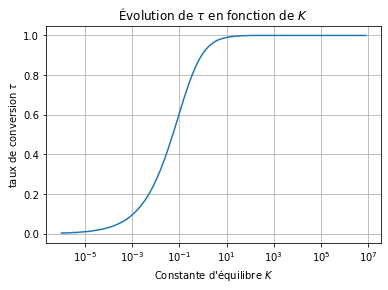

### Pour $K = 10^4$, $\tau=0.999$

In [46]:
C = np.asarray([-1, -1, 1, 1])
N = np.asarray([0.1, 1, 0, 0])
avancement(C, N)


# $0 = -6A -2B +1C +1D$

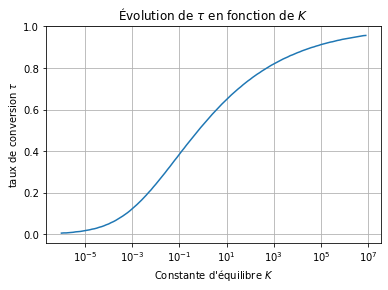

### Pour $K = 10^4$, $\tau=0.873$

In [51]:
C = np.asarray([-6, -2, 1, 1])
N = np.asarray([1, 1, 0, 0])
avancement(C, N)